In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
train_df = pd.read_csv("../../data/train.txt", sep="\t")
val_df = pd.read_csv("../../data/validation.txt", sep="\t")

In [3]:
df = pd.concat([train_df, val_df])
df = df.reset_index(drop=True)

In [4]:
df

,Sentence,UserID,Datetime,Train/Dev/Test,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,...,Reader3_Disgust,Reader3_Trust,Avg. Readers_Joy,Avg. Readers_Sadness,Avg. Readers_Anticipation,Avg. Readers_Surprise,Avg. Readers_Anger,Avg. Readers_Fear,Avg. Readers_Disgust,Avg. Readers_Trust
0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,1,2012/07/31 23:48,train,0,1,2,1,1,0,...,1,0,0,2,0,0,0,0,0,0
1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,1,2012/08/02 23:09,train,3,0,3,0,0,0,...,0,1,1,0,0,2,0,0,0,0
2,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。,1,2012/08/05 00:50,train,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,眠い、眠れない。,1,2012/08/08 01:36,train,0,2,1,0,0,1,...,2,0,0,1,0,0,0,0,1,0
4,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!,1,2012/08/09 22:24,train,2,1,3,2,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,真夜中にふと思い立ち、ノートPCを持って部屋を出て、ダイニングで仕事したらすんごい捗った。\...,80,2020/09/15 08:01,train,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
43196,ぐっどこんでぃしょん。\n心も頭もクリア。\n秋分の日のおかげかな？\n人と自然としっとり過...,80,2020/09/22 01:52,train,1,0,1,0,0,0,...,0,0,2,0,2,0,0,0,0,0
43197,朝から免許の更新へ。\n90分で終わり、出口へ向かうと献血の呼びかけが。\nみんな通り過ぎて...,80,2020/09/23 22:32,train,2,0,2,1,0,0,...,0,0,2,0,0,0,0,0,0,0
43198,夜も更けて参りましたが、食後のコーヒーが飲みたいのでドリップ開始…\n\nぼんやり秋の夜長を...,80,2020/10/11 00:12,train,2,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [5]:
label_mat = df.iloc[:, 4:]
label_mat

,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,Writer_Disgust,Writer_Trust,Reader1_Joy,Reader1_Sadness,...,Reader3_Disgust,Reader3_Trust,Avg. Readers_Joy,Avg. Readers_Sadness,Avg. Readers_Anticipation,Avg. Readers_Surprise,Avg. Readers_Anger,Avg. Readers_Fear,Avg. Readers_Disgust,Avg. Readers_Trust
0,0,1,2,1,1,0,0,1,0,2,...,1,0,0,2,0,0,0,0,0,0
1,3,0,3,0,0,0,0,3,0,0,...,0,1,1,0,0,2,0,0,0,0
2,1,1,1,1,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,2,1,0,0,1,0,1,0,0,...,2,0,0,1,0,0,0,0,1,0
4,2,1,3,2,0,1,0,2,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
43196,1,0,1,0,0,0,0,2,1,0,...,0,0,2,0,2,0,0,0,0,0
43197,2,0,2,1,0,0,0,2,1,0,...,0,0,2,0,0,0,0,0,0,0
43198,2,0,1,0,0,0,0,0,1,0,...,0,0,0,0,2,0,0,0,0,0


In [6]:
label_mat_scaled = (label_mat - label_mat.mean()) / label_mat.std()
label_mat_scaled

,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,Writer_Disgust,Writer_Trust,Reader1_Joy,Reader1_Sadness,...,Reader3_Disgust,Reader3_Trust,Avg. Readers_Joy,Avg. Readers_Sadness,Avg. Readers_Anticipation,Avg. Readers_Surprise,Avg. Readers_Anger,Avg. Readers_Fear,Avg. Readers_Disgust,Avg. Readers_Trust
0,-0.725777,0.360737,1.301225,0.522890,1.132139,-0.411854,-0.458341,0.763563,-0.497470,2.766906,...,0.668544,-0.169571,-0.593224,2.506116,-0.608162,-0.522398,-0.166934,-0.470075,-0.414775,-0.206227
1,2.017478,-0.648448,2.291324,-0.565047,-0.345858,-0.411854,-0.458341,3.233771,-0.497470,-0.372310,...,-0.468238,3.049008,0.683353,-0.534800,-0.608162,2.701083,-0.166934,-0.470075,-0.414775,-0.206227
2,0.188641,0.360737,0.311125,0.522890,-0.345858,-0.411854,-0.458341,1.998667,-0.497470,-0.372310,...,-0.468238,-0.169571,-0.593224,-0.534800,-0.608162,1.089342,-0.166934,-0.470075,-0.414775,-0.206227
3,-0.725777,1.369922,0.311125,-0.565047,-0.345858,0.972315,-0.458341,0.763563,-0.497470,-0.372310,...,1.805326,-0.169571,-0.593224,0.985658,-0.608162,-0.522398,-0.166934,-0.470075,1.420740,-0.206227
4,1.103060,0.360737,2.291324,1.610826,-0.345858,0.972315,-0.458341,1.998667,-0.497470,-0.372310,...,-0.468238,-0.169571,0.683353,-0.534800,-0.608162,1.089342,-0.166934,-0.470075,-0.414775,-0.206227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,-0.725777,-0.648448,0.311125,-0.565047,-0.345858,-0.411854,-0.458341,0.763563,0.746853,-0.372310,...,-0.468238,-0.169571,0.683353,-0.534800,-0.608162,1.089342,-0.166934,-0.470075,-0.414775,-0.206227
43196,0.188641,-0.648448,0.311125,-0.565047,-0.345858,-0.411854,-0.458341,1.998667,0.746853,-0.372310,...,-0.468238,-0.169571,1.959930,-0.534800,2.073127,-0.522398,-0.166934,-0.470075,-0.414775,-0.206227
43197,1.103060,-0.648448,1.301225,0.522890,-0.345858,-0.411854,-0.458341,1.998667,0.746853,-0.372310,...,-0.468238,-0.169571,1.959930,-0.534800,-0.608162,-0.522398,-0.166934,-0.470075,-0.414775,-0.206227
43198,1.103060,-0.648448,0.311125,-0.565047,-0.345858,-0.411854,-0.458341,-0.471541,0.746853,-0.372310,...,-0.468238,-0.169571,-0.593224,-0.534800,2.073127,-0.522398,-0.166934,-0.470075,-0.414775,-0.206227


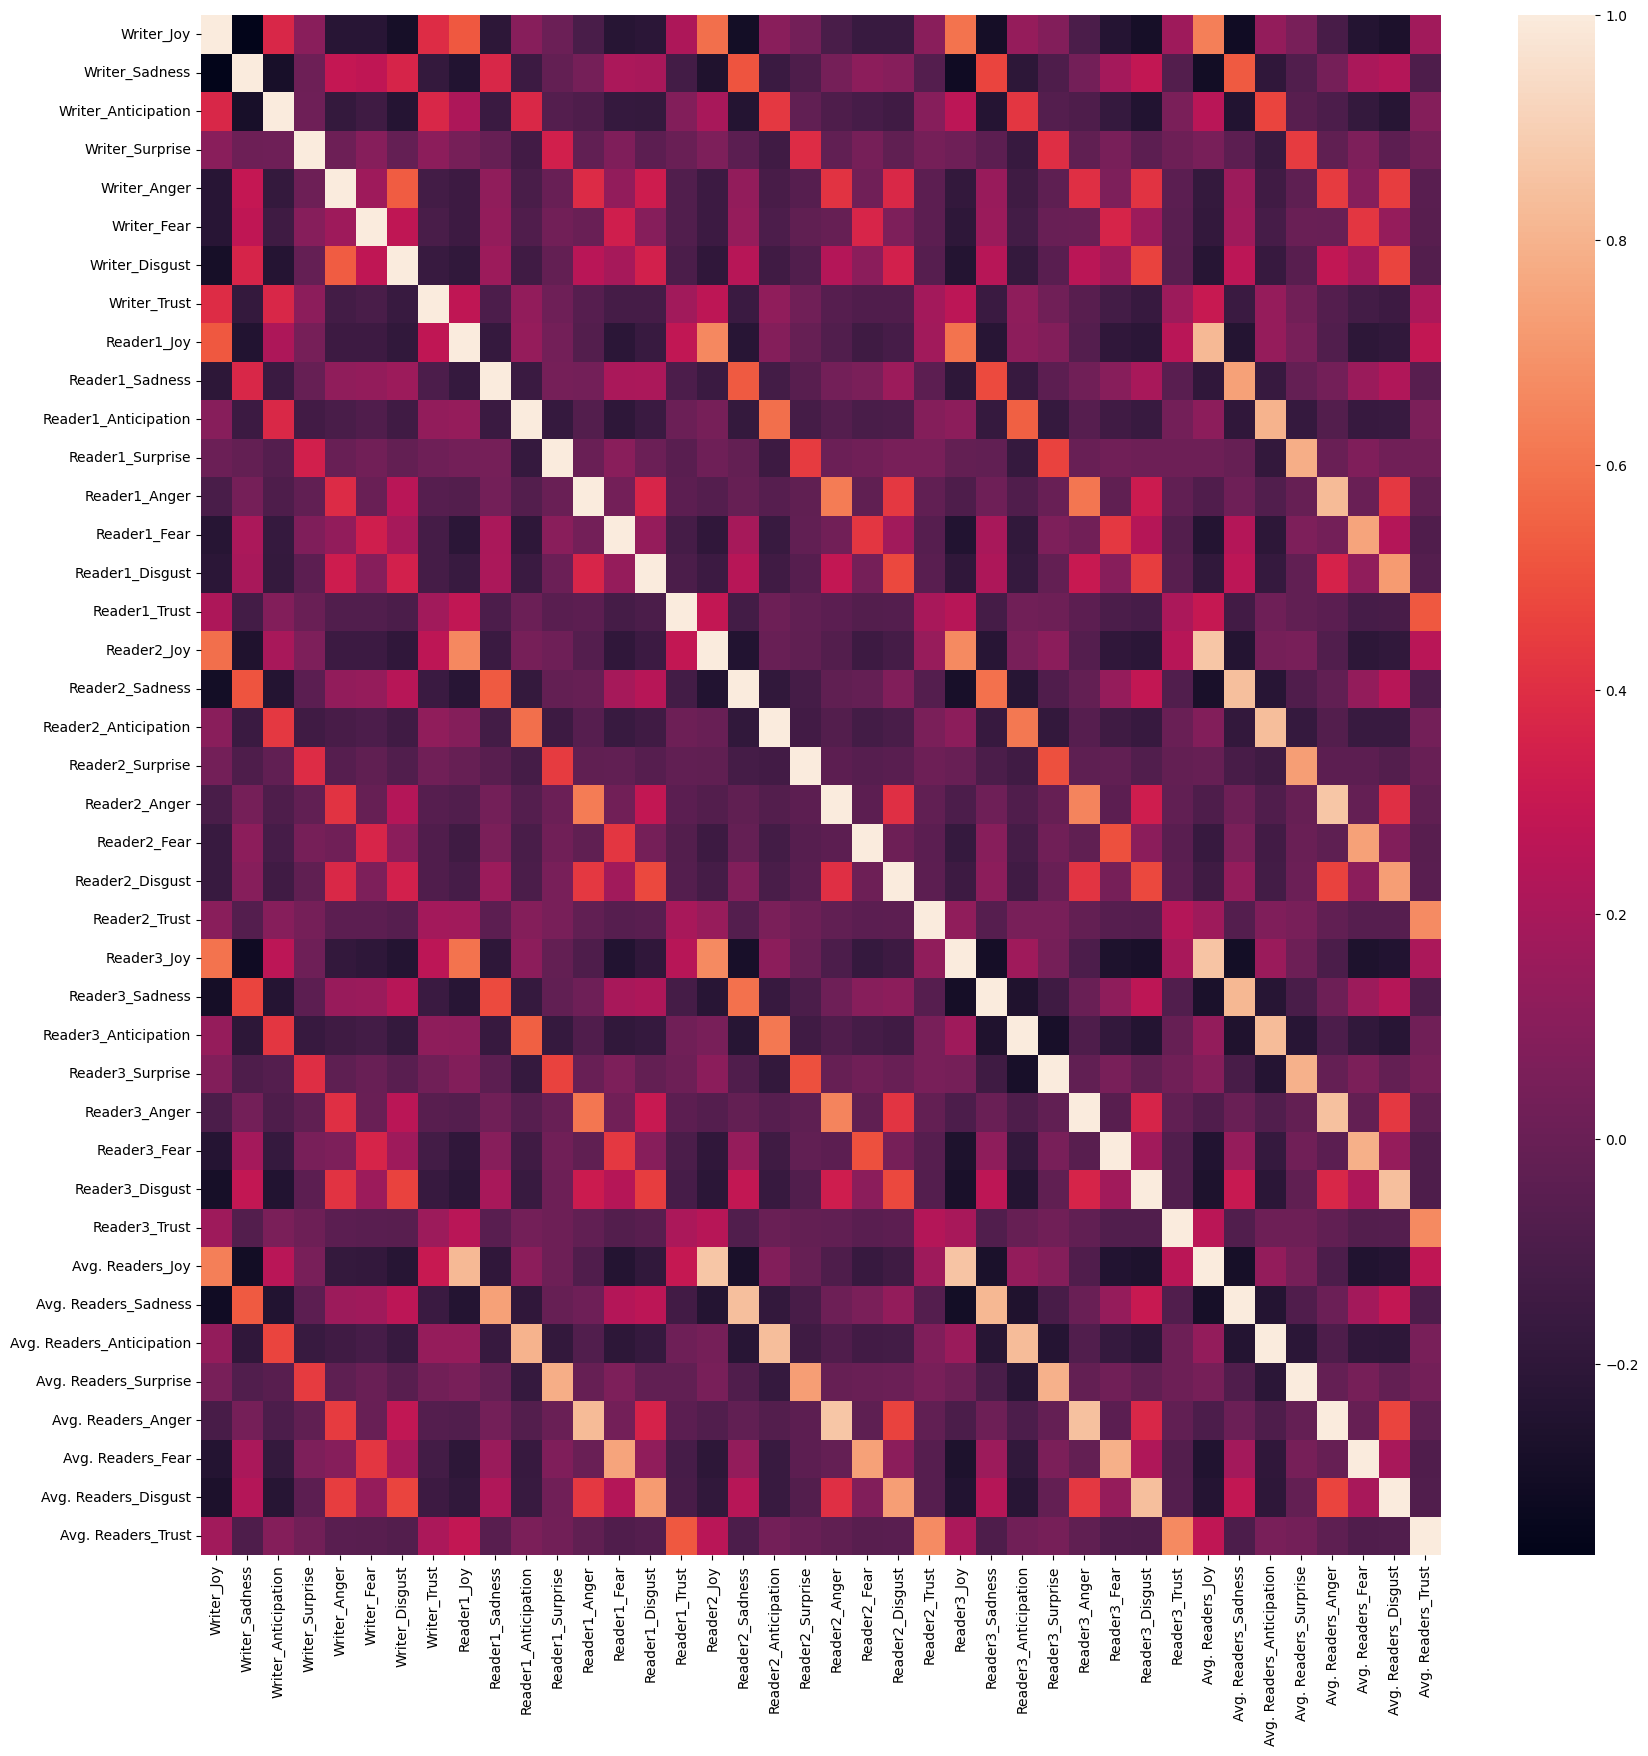

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(label_mat_scaled.corr())
plt.show()

In [8]:
pca = PCA(n_components=2)
pca.fit(label_mat_scaled)

PCA(n_components=2)

In [9]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=label_mat.columns)
loadings

,PC1,PC2
Writer_Joy,-0.220105,0.085937
Writer_Sadness,0.193770,-0.087131
Writer_Anticipation,-0.178660,0.066438
Writer_Surprise,-0.002912,-0.065329
Writer_Anger,0.173891,0.201412
Writer_Fear,0.127107,-0.101932
Writer_Disgust,0.197501,0.104687
Writer_Trust,-0.137246,0.057212
Reader1_Joy,-0.200109,0.111395
Reader1_Sadness,0.159501,-0.077491


In [10]:
score = pd.DataFrame(pca.transform(label_mat_scaled), columns=['PC1', 'PC2'])
score

,PC1,PC2
0,2.335795,-1.495043
1,-3.018446,0.169597
2,-0.636627,-0.796912
3,2.647444,-0.431663
4,-1.807685,-0.575944
...,...,...
43195,-1.658194,-0.070320
43196,-4.139115,1.514994
43197,-2.965140,0.781994
43198,-2.405356,0.615167


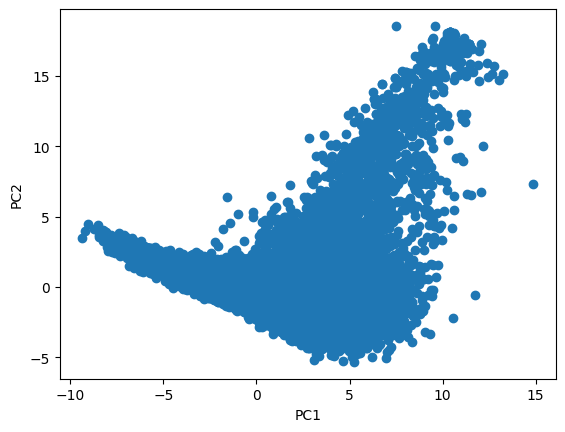

In [11]:
plt.scatter(score['PC1'], score['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [12]:
pc1 = np.zeros(8)
for i in range(5):
    for j in range(8):
        pc1[j] += loadings["PC1"][i * 8 + j]
pc1

C:\Users\Yumib\AppData\Local\Temp\ipykernel_36968\3922191196.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1[j] += loadings["PC1"][i * 8 + j]


array([-1.07383361,  0.9432544 , -0.7889093 , -0.01250483,  0.69469477,
        0.70261506,  1.01606643, -0.50519831])

In [13]:
loadings["PC1"].values.reshape(5, 8)

array([[-0.22010524,  0.19376962, -0.17866027, -0.00291193,  0.17389124,
         0.1271069 ,  0.19750082, -0.13724621],
       [-0.20010869,  0.15950074, -0.14086498,  0.01888097,  0.12773652,
         0.165167  ,  0.1872097 , -0.10616779],
       [-0.19759911,  0.1887996 , -0.13826853, -0.01819598,  0.12571503,
         0.10483022,  0.16855365, -0.07443479],
       [-0.22381983,  0.18977973, -0.16233726, -0.0078756 ,  0.12603958,
         0.13990264,  0.22684048, -0.08389463],
       [-0.23220074,  0.2114047 , -0.16877827, -0.0024023 ,  0.1413124 ,
         0.16560829,  0.23596177, -0.10345489]])

In [14]:
kind = [str(c).removeprefix("Writer_") for c in loadings.index[:8]]
kind

['Joy',
 'Sadness',
 'Anticipation',
 'Surprise',
 'Anger',
 'Fear',
 'Disgust',
 'Trust']

In [15]:
pd.DataFrame(loadings["PC1"].values.reshape(5, 8), columns=kind)

,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,-0.220105,0.193770,-0.178660,-0.002912,0.173891,0.127107,0.197501,-0.137246
1,-0.200109,0.159501,-0.140865,0.018881,0.127737,0.165167,0.187210,-0.106168
2,-0.197599,0.188800,-0.138269,-0.018196,0.125715,0.104830,0.168554,-0.074435
3,-0.223820,0.189780,-0.162337,-0.007876,0.126040,0.139903,0.226840,-0.083895
4,-0.232201,0.211405,-0.168778,-0.002402,0.141312,0.165608,0.235962,-0.103455


PC1が負ならポジティブ、正ならネガティブになってる！

In [16]:
label = np.where(score["PC1"] < 0, "p", "n")
label

array(['n', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1')

In [17]:
train_label = pd.Series(label[:len(train_df)])
val_label = pd.Series(label[len(train_df):])

In [19]:
train_label

0        n
1        p
2        p
3        n
4        p
        ..
39995    n
39996    p
39997    p
39998    n
39999    p
Length: 40000, dtype: object

In [18]:
train_label.to_csv("../../data/v2/train_label.csv", index=False, header=False)
val_label.to_csv("../../data/v2/val_label.csv", index=False, header=False)